# Linear Autoencoder

In [ ]:
# original --> encoded --> reconstruction

# application --> video compression

# minimize the loss between the original end the reconstruction

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
#data loading

transform=transforms.ToTensor()

# with the following transform the values are between [-1,+1] 
# so we would need Tanh as last layer of the decoder
#transform=transforms.Compose([
#    transforms.ToTensor(),
#    transforms.Normalize((0.5),(0.5))
#])


mnist_data=datasets.MNIST(root='./data',train=True,download=True,transform=transform)

data_loader=torch.utils.data.DataLoader(mnist_data,
                                       batch_size=64,
                                       shuffle=True)

dataiter=iter(data_loader)
images,labels=dataiter.next()
print(torch.min(images),torch.max(images))

In [4]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder=nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,20),
        nn.ReLU(),
        nn.Linear(20,3)
        )
        
        self.decoder=nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
        )
    
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
        

In [7]:
model=Autoencoder_Linear()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001,weight_decay=0.00001)

In [8]:
# training 
num_epochs=10
outputs=[]
for e in range(num_epochs):
    for img,_ in data_loader:
        img=img.reshape(-1,28*28)
        reconstructed_img=model(img)
        loss=criterion(reconstructed_img,img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {e+1}, Loss: {loss.item():.4f}')
    outputs.append((e,img,reconstructed_img))

Epoch: 1, Loss: 0.0468
Epoch: 2, Loss: 0.0428
Epoch: 3, Loss: 0.0344
Epoch: 4, Loss: 0.0404
Epoch: 5, Loss: 0.0367
Epoch: 6, Loss: 0.0429
Epoch: 7, Loss: 0.0365
Epoch: 8, Loss: 0.0362
Epoch: 9, Loss: 0.0283
Epoch: 10, Loss: 0.0305


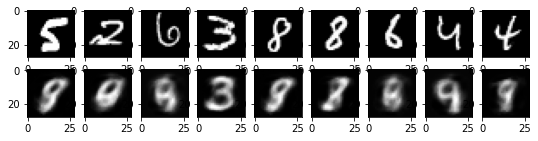

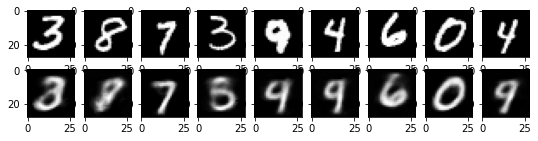

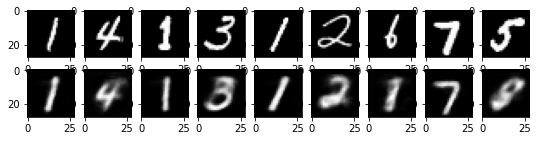

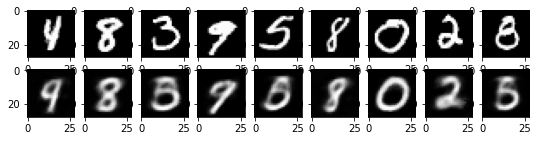

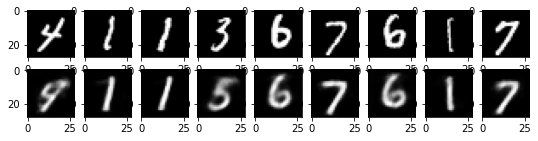

In [16]:
for k in range(0,num_epochs,2):
    plt.figure(figsize=(9,2))
    plt.gray()
    images=outputs[k][1].detach().numpy()
    recon_images=outputs[k][2].detach().numpy()
    for i,item in enumerate(images):
        if i>=9:
            break
        plt.subplot(2,9,i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])
    for i,item in enumerate(recon_images):
        if i>=9:
            break
        plt.subplot(2,9,9+i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])

# Convolutional Autoencoder

In [19]:
class Autoencoder_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # N,1,28,28
        self.encoder=nn.Sequential(
        nn.Conv2d(1,16,3,stride=2,padding=1),#N 16,14,14
        nn.ReLU(),
        nn.Conv2d(16,32,3,stride=2,padding=1),#N 32,7,7
        nn.ReLU(),
        nn.Conv2d(32,64,7) #N 64,1,1
        )
        
        self.decoder=nn.Sequential(
        nn.ConvTranspose2d(64,32,7),
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1),
        nn.Sigmoid()
        )
    
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

In [20]:
model=Autoencoder_CNN()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001,weight_decay=0.00001)

In [ ]:
# training 
num_epochs=10
outputs=[]
for e in range(num_epochs):
    for img,_ in data_loader:
        
        reconstructed_img=model(img)
        loss=criterion(reconstructed_img,img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {e+1}, Loss: {loss.item():.4f}')
    outputs.append((e,img,reconstructed_img))

In [ ]:
for k in range(0,num_epochs,2):
    plt.figure(figsize=(9,2))
    plt.gray()
    images=outputs[k][1].detach().numpy()
    recon_images=outputs[k][2].detach().numpy()
    for i,item in enumerate(images):
        if i>=9:
            break
        plt.subplot(2,9,i+1)
        plt.imshow(item[0])
    for i,item in enumerate(recon_images):
        if i>=9:
            break
        plt.subplot(2,9,9+i+1)
        plt.imshow(item[0])